<a href="https://colab.research.google.com/github/snehotosh/Deep-Learning/blob/master/10_YOLOv3_in_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Keras Implementation of YOLO

**Steps**
1. Clone this repository to your PC (https://github.com/miranthajayatilake/YOLOw-Keras)
2. Download any Darknet model cfg and weights from the official YOLO website.
3. Convert the dowloaded cfg and weights files into a h5 file using YAD2K library. (This is explained step by step below in the more details section)
    * Clone the YAD2K Library to your PC
    * Open terminal from the cloned directory
    * Copy and paste the downloaded weights and cfg files to the YAD2K master directory
    * Run python yad2k.py yolo.cfg yolo.weights model_data/yolo.h5 on the terminal and the h5 file will be generated.
    * Move the generated h5 file to model_data folder of the simpleYOLOwKeras directory
4. Copy the generated h5 file to the model_data folder and edit the name of the pretrained model in yolo.py code to the name of your h5 file.
5. Place the input image you want to try object detection in the images folder and copy its file name.
6. Assign your input image file name to input_image_name variable in yolo.py.
7. Open terminal from the repository directory directly and run the yolo.py file
python yolo.py

This notebook is an attempt to implement Yolo as per the github repository https://github.com/miranthajayatilake/YOLOw-Keras

### Step1: Cloning the repo

In [1]:
## Step1: Cloning the repo
! git clone https://github.com/miranthajayatilake/YOLOw-Keras.git

Cloning into 'YOLOw-Keras'...
remote: Enumerating objects: 60, done.
remote: Total 60 (delta 0), reused 0 (delta 0), pack-reused 60
Unpacking objects: 100% (60/60), done.


### Step2: Download any Darknet model cfg and weights from the official YOLO website.

In [2]:
!pip install -U -q PyDrive

    100% |████████████████████████████████| 993kB 22.3MB/s 


### Downloading file from Google drive to Colab

In [0]:
## Step2: Download any Darknet model cfg and weights from the official YOLO website.
#!wget https://github.com/pjreddie/darknet/blob/master/cfg/yolov2.cfg
#!wget https://pjreddie.com/media/files/yolov2.weights

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# file_id: string (id of the file you want to download)
# title: string (name which you want to give to the file being downloaded)
def download_file_from_drive(file_id, title):
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)
  
  download = drive.CreateFile({'id': file_id})
  download.GetContentFile(title)

In [0]:
yolov2cfg=download_file_from_drive('1YSnXceV1lTaR2Gp6uR2Rv9KR7Ib-xm34', 'yolov2.cfg')
yolov2weights=download_file_from_drive('1wJNd0a6cmfwak6Cs8d57SmJBNSjBFDel', 'yolov2.weights')

In [5]:
!ls

adc.json  sample_data  yolov2.cfg  yolov2.weights  YOLOw-Keras


### Convert the dowloaded cfg and weights files into a h5 file using YAD2K library.

In [6]:
## Clone the YAD2K Library
!git clone https://github.com/allanzelener/YAD2K.git

Cloning into 'YAD2K'...
remote: Enumerating objects: 243, done.
remote: Total 243 (delta 0), reused 0 (delta 0), pack-reused 243
Receiving objects: 100% (243/243), 2.35 MiB | 15.23 MiB/s, done.
Resolving deltas: 100% (106/106), done.


In [7]:
!ls

adc.json  sample_data  YAD2K  yolov2.cfg  yolov2.weights  YOLOw-Keras


In [0]:
## Copy and paste the downloaded weights and cfg files to the YAD2K master directory
! cp -R yolov2.* YAD2K

In [9]:
! ls YAD2K

environment.yml  LICENSE	  test_yolo.py		  yad2k.py
etc		 model_data	  train_overfit.py	  yolov2.cfg
font		 README.md	  voc_conversion_scripts  yolov2.weights
images		 retrain_yolo.py  yad2k


In [10]:
## Change the directory to YAD2K master directory
import os
os.chdir('/content/YAD2K')

# Running the command to convert into h5 format
! python yad2k.py yolov2.cfg yolov2.weights model_data/yolo.h5

Using TensorFlow backend.
Loading weights.
Weights Header:  [       0        1        0 32013312]
Parsing Darknet config.
Creating Keras model.
Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)
Instructions for updating:
Colocations handled automatically by placer.
2019-03-19 14:39:22.095843: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-03-19 14:39:22.096326: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x27a7340 executing computations on platform Host. Devices:
2019-03-19 14:39:22.096372: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
2019-03-19 14:39:22.259208: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-03-19 14:39:22.259787: I tensorflow/compiler/xla/service/service.cc:150] XLA s

In [0]:
# Change directory to one level up.(base level)
os.chdir('/content')

In [0]:
## Moving the file to YOLOw-Keras/model_data
!mv /content/YAD2K/model_data/yolo.h5 /content/YOLOw-Keras/model_data

In [0]:
os.chdir('/content/YOLOw-Keras')

In [0]:
## Rename the default image file name to the hardcoded name used in yolo.py
! mv images/test4.jpg images/test45.jpg

In [15]:
! python yolo.py

Using TensorFlow backend.
Instructions for updating:
Colocations handled automatically by placer.
2019-03-19 14:39:49.760810: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-03-19 14:39:49.761090: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x20dd340 executing computations on platform Host. Devices:
2019-03-19 14:39:49.761140: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
2019-03-19 14:39:49.860793: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-03-19 14:39:49.861291: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x20dcdc0 executing computations on platform CUDA. Devices:
2019-03-19 14:39:49.861358: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): Tesla K80, Compute Capabilit

In [16]:
!ls -l out ## File generated in the out directory

total 288
-rw-r--r-- 1 root root 145750 Mar 19 14:39 test45.jpg
-rw-r--r-- 1 root root 145669 Mar 19 14:37 test4.jpg


/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:1334: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")


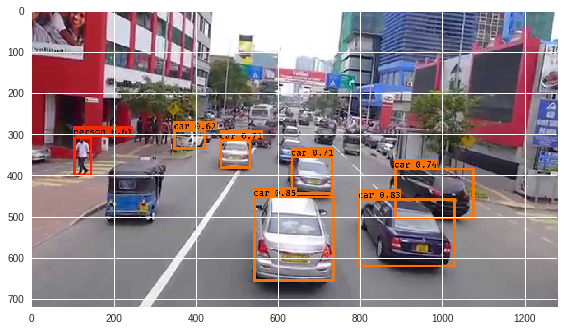

In [17]:
from skimage import io
io.imshow('out/test45.jpg')

In [0]:
## cv2 way of displaying image
import cv2
import numpy as np
import PIL
from IPython.display import display

def cv2_imshow(a):
  """A replacement for cv2.imshow() for use in Jupyter notebooks."""
  a = a.clip(0, 255).astype('uint8')
  # cv2 stores colors as BGR; convert to RGB
  if a.ndim == 3:
    if a.shape[2] == 4:
      a = cv2.cvtColor(img, cv2.COLOR_BGRA2RGBA)
    else:
      a = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  display(PIL.Image.fromarray(a))

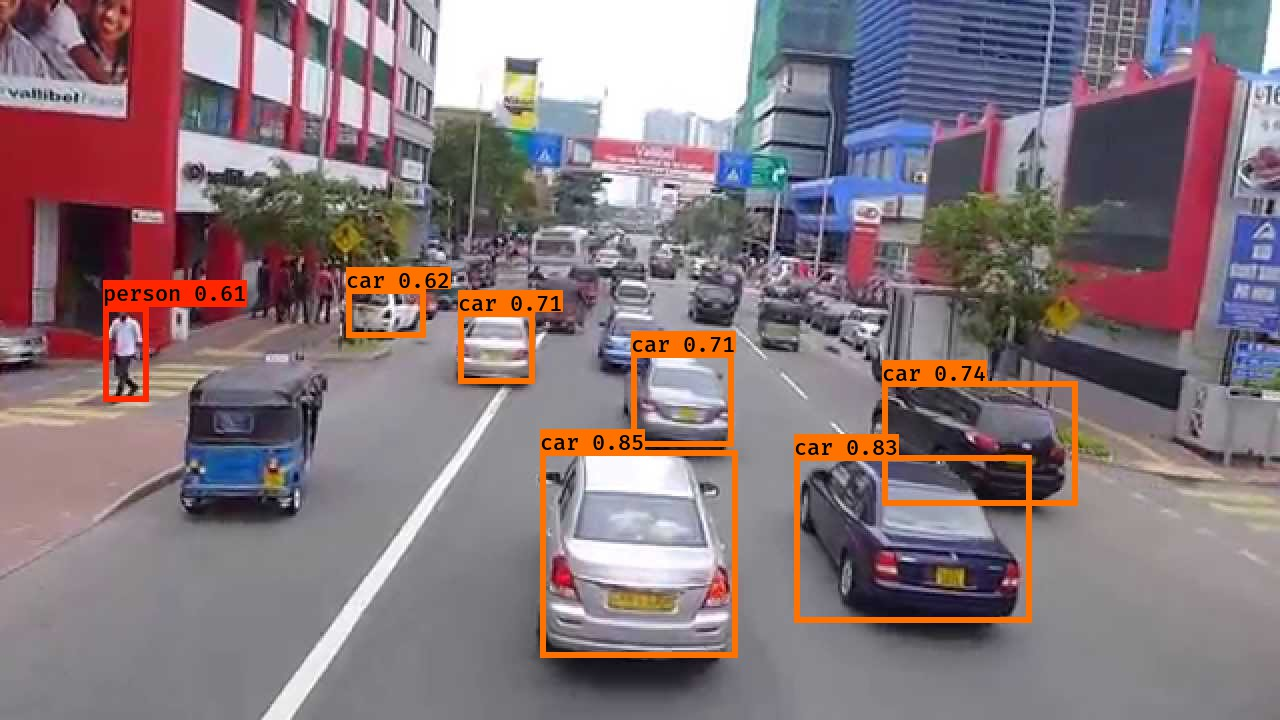

In [19]:
img = cv2.imread('out/test45.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

## Thats it!